# COVID-19 CASES AND DEATHS IN GREECE.<br>
### MAP PLOTS USING CHOROPLETH MAPS

This is a project for Covid cases in Greece. I gathered data from many sources and combined them. I finally used choropleth maps, to plot the data and reach some conclusions.
The last update I used on Covid cases and deaths was on 8 October 2020. However, if you run the code it should work for later updates. (It depends on the wikipedia site updates).
Finally, the interactive maps made the jupyter file very large and I couldn't upload it to GitHub. That is why I used firefox to render the image and then I downloaded it so I could make it appear in the notebook, just to get an idea of the map.

First, we will import our libraries

In [1]:
import pandas as pd
import re
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.tools as tls

Now we will downlad from [this](http://geodata.gov.gr/en/dataset/28121643-d977-48eb-a8ca-a6fac6b4af6d) site, the json file that contains the geographic boundaries of the 13 Regions of Greece.

In [2]:
from urllib.request import urlopen
import json
with urlopen('http://geodata.gov.gr/geoserver/wfs/?service=WFS&version=1.0.0&request=GetFeature&typeName=geodata.gov.gr:d7f50467-e5ef-49ac-a7ce-15df3e2ed738&outputFormat=application/json&srsName=epsg:4326') as response:
    greek_states = json.load(response)


In [3]:
print(greek_states['features'][0].keys()) # Check our file
print(greek_states['features'][0]['properties'].keys())
print(greek_states['features'][0]['properties']['PER'])

dict_keys(['type', 'id', 'geometry', 'geometry_name', 'properties'])
dict_keys(['PER'])
Π. ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ - ΘΡΑΚΗΣ


We will continue and download [the Covid cases by region](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Greece) data from Wikipedia. Below is the procedure I followed:
<br>

- First, I scanned the page for DataFrames with the help of pandas.<br>
- Then, I found the amount of DataFrames.<br>
- I checked that I had the correct DataFrame.<br>

If you prefer, you can also download the DataFrame as csv.<br>
Now we are ready to read and clean our data 

In [4]:
Covid_Greece_Wiki = pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Greece')
len(Covid_Greece_Wiki)

6

In [5]:
Covid_Greece_Wiki[4]

,Region,Cases,Deaths,Recov.,Active,Tests
0,Attica,5579,127,NaN,NaN,NaN
1,Central Macedonia,2759,72,NaN,NaN,NaN
2,Peloponnese,339,1,NaN,NaN,NaN
3,Thessaly,603,6,NaN,NaN,NaN
4,Western Macedonia,444,34,NaN,NaN,NaN
5,Eastern Macedonia and Thrace,812,32,NaN,NaN,NaN
6,Western Greece,190,8,NaN,NaN,NaN
7,Central Greece,285,0,NaN,NaN,NaN
8,Crete,465,2,NaN,NaN,NaN
9,Ionian Islands,275,3,NaN,NaN,NaN


In [6]:
data = Covid_Greece_Wiki[4].iloc[:-4] # Remove the last rows
data = data.loc[:,'Region':'Deaths'] # Remove the unnecessary columns


We will replace the greek with the english names of the regions in greek_states, so the names will be the same in both files.

In [7]:
for x in range(0,13):
    print(greek_states['features'][x]['properties']['PER'])

Π. ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ - ΘΡΑΚΗΣ
Π. ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ
Π. ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ
Π. ΗΠΕΙΡΟΥ
Π. ΘΕΣΣΑΛΙΑΣ
Π. ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ
Π. ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ
Π. ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ
Π. ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ
Π. ΠΕΛΟΠΟΝΝΗΣΟΥ
Π. ΙΟΝΙΩΝ ΝΗΣΩΝ
Π. ΚΡΗΤΗΣ
Π. ΑΤΤΙΚΗΣ


In [8]:
lis = ['Eastern Macedonia and Thrace','Central Macedonia','Western Macedonia',
       'Epirus','Thessaly','North Aegean','South Aegean','Central Greece',
       'Western Greece','Peloponnese','Ionian Islands','Crete','Attica'] 


for x in range(0,13):
    greek_states['features'][x]['properties']['PER'] = lis[x]

for x in range(0,13):
    print(greek_states['features'][x]['properties']['PER'])


Eastern Macedonia and Thrace
Central Macedonia
Western Macedonia
Epirus
Thessaly
North Aegean
South Aegean
Central Greece
Western Greece
Peloponnese
Ionian Islands
Crete
Attica


There are some settings we need to change in order to plot the map in a browser. Here we use Firefox.

In [9]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'firefox'
import webbrowser    
urL='https://www.google.com'
firefox_path="C:/Program Files/Mozilla Firefox/firefox.exe"
webbrowser.register('firefox', None,webbrowser.BackgroundBrowser(firefox_path))
webbrowser.get('firefox').open_new_tab(urL)

True

We will create a dictionary that has all the regions and the unique ID for each region, so we can later use the choropleth function.

In [10]:
state_id_map = {}
for x in greek_states['features']:
    state_id_map[x['properties']['PER']] = x['id'] 

state_id_map

{'Eastern Macedonia and Thrace': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.0',
 'Central Macedonia': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.1',
 'Western Macedonia': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.2',
 'Epirus': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.3',
 'Thessaly': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.4',
 'North Aegean': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.5',
 'South Aegean': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.6',
 'Central Greece': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.7',
 'Western Greece': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.8',
 'Peloponnese': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.9',
 'Ionian Islands': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.10',
 'Crete': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.11',
 'Attica': 'd7f50467-e5ef-49ac-a7ce-15df3e2ed738.12'}

Now we make a new column with the ID of each region.

In [11]:
data['id'] = data['Region'].apply(lambda x: state_id_map[x])

We are now ready to plot the maps! I used the continuous colour scale for better contrast, even if there are no negative values. Also I couldn't upload large files on GitHub, so I downloaded the images from my browser just to show them here.<br>
The first map is the number of Covid cases.

In [12]:
fig = px.choropleth(data,locations='id',
                    geojson=greek_states,
                    color='Cases',
                    hover_name = ('Region'),
                    hover_data = ['Cases','Deaths'],
                    color_continuous_scale=px.colors.diverging.RdBu,
                    color_continuous_midpoint=0)
fig.update_geos(fitbounds='locations',visible=False)
fig.show()


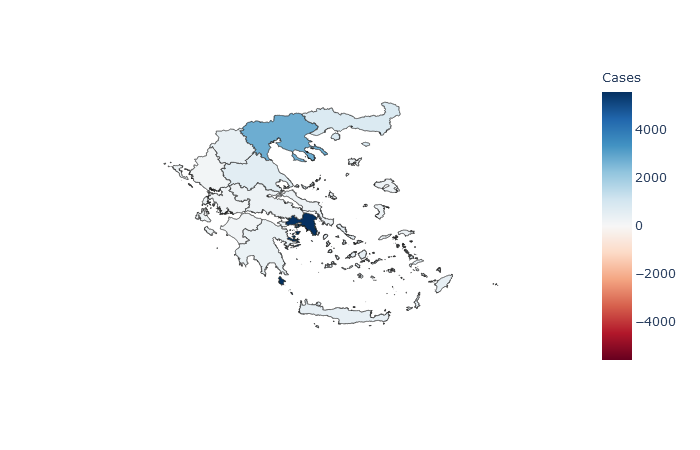

In [13]:
import requests
import IPython.display as Disp
url = 'https://github.com/AngelosTheodorakis/Data_Analysis_Projects/blob/master/Covid-19_Greece/images/Greece_cases.png?raw=true'
Disp.Image(requests.get(url).content)

The second map is the number of deaths caused by Covid-19.

In [14]:
fig = px.choropleth(data,locations='id',
                    geojson=greek_states,
                    color='Deaths',
                    hover_name = ('Region'),
                    hover_data = ['Deaths','Cases'],
                    color_continuous_scale=px.colors.diverging.RdBu,
                    color_continuous_midpoint=0)
fig.update_geos(fitbounds='locations',visible=False)
fig.show()

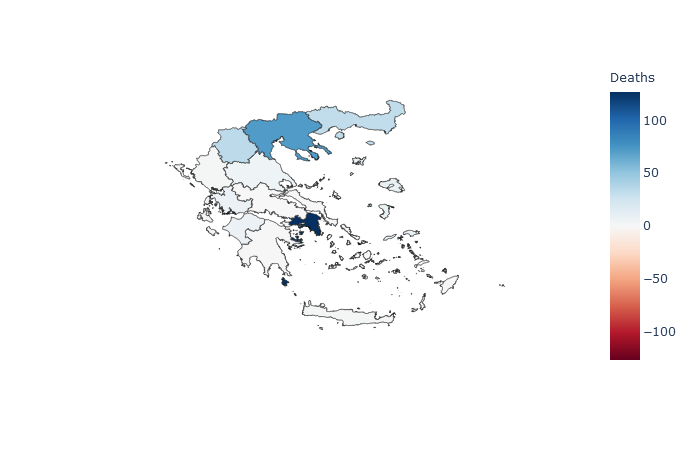

In [15]:
url = 'https://github.com/AngelosTheodorakis/Data_Analysis_Projects/blob/master/Covid-19_Greece/images/Greece_covid_deaths.png?raw=true'
Disp.Image(requests.get(url).content)

As we can see from the above maps, it seems that Attica and Central Macedonia have in absolute numbers, more Covid cases as well as deaths. But what about the proportion of cases with the population for each region? To find this, we must first find the overall population for each region and then combine the datasets. The population data can be found [here](https://www.citypopulation.de/en/greece/nuts/admin/).

In [16]:
Greek_population = pd.read_html('https://www.citypopulation.de/en/greece/nuts/admin/') # Read the data
len(Greek_population)

2

In [17]:
datanew = Greek_population[0] # Save our Dataframe in a new variable.

In [18]:
datanew.columns # Check our columns

Index(['Name', 'Native', 'Status', 'PopulationEstimate2002-01-01',
       'PopulationEstimate2007-01-01', 'PopulationEstimate2012-01-01',
       'PopulationEstimate2017-01-01', 'PopulationEstimate2019-01-01',
       'Unnamed: 8'],
      dtype='object')

In [19]:
datanew.head()

,Name,Native,Status,PopulationEstimate2002-01-01,PopulationEstimate2007-01-01,PopulationEstimate2012-01-01,PopulationEstimate2017-01-01,PopulationEstimate2019-01-01,Unnamed: 8
0,Anatolikí Makedonía kai Thrakí [Eastern Macedo...,Ανατολική Μακεδονία και Θράκη,NUTS 2 Region,589489,602965,612074,602799,599723,→
1,Nomós Drámas [Drama],Νομός Δράμας,NUTS 3 Region,96234,97460,98571,96836,96845,→
2,Nomós Évrou [Evros],Νομός Έβρου,NUTS 3 Region,144134,146507,147996,147709,147190,→
3,Nomós Kaválas kai Thásou [Kavala - Thasos],Νομός Καβάλας και Θάσου,NUTS 3 Region,138770,139582,139393,134411,133391,→
4,Nomós Rodópis [Rhodope],Νομός Ροδόπης,NUTS 3 Region,106252,110192,113244,111731,110666,→


Next we will keep only the 'Nuts 2 Region' status , delete some columns and extract the Region name inside the brackets.

In [20]:
data_Regions = datanew[datanew['Status'] == 'NUTS 2 Region']
data_Regions = data_Regions.loc[:,'Name':'PopulationEstimate2019-01-01']
data_Regions['Name'] = data_Regions['Name'].str.extract(r'\[(\w.+)\]')
data_Regions.rename(columns = {'Name':'Region'}, inplace = True) # change column name to merge later.


Now let's combine the Dataframes and create some new columns.

In [21]:

combined = data.merge(data_Regions, on="Region", how="left") # Combine the dataframes.

combined['Cases_Analogy_Percent'] = combined['Cases'].astype(int)/combined['PopulationEstimate2019-01-01'].astype(int)*100
combined['Deaths_Analogy_Percent'] = combined['Deaths'].astype(int)/combined['PopulationEstimate2019-01-01'].astype(int)*100
combined['Cases_1 out of'] = round(100/combined['Cases_Analogy_Percent'])
combined['Deaths_1 out of'] = round(100/combined['Deaths_Analogy_Percent'])




Now let's plot the map.

In [22]:
fig = px.choropleth(combined,
                    locations='id',
                    geojson=greek_states,
                    color='Cases_Analogy_Percent',
                    hover_name = ('Native'),
                    hover_data = ['Cases','Deaths'])
fig.update_geos(fitbounds='locations',visible=False)
fig.show()

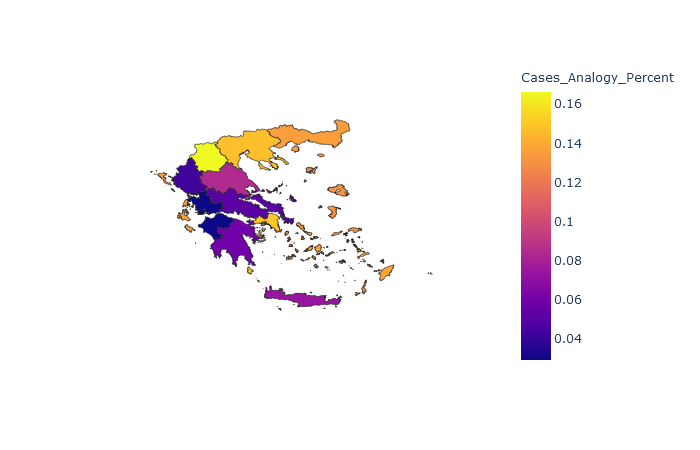

In [23]:
url = 'https://github.com/AngelosTheodorakis/Data_Analysis_Projects/blob/master/Covid-19_Greece/images/Greece_cases_prop.png?raw=true'
Disp.Image(requests.get(url).content)


In [24]:
fig = px.choropleth(combined,
                    locations='id',
                    geojson=greek_states,
                    color='Deaths_Analogy_Percent',
                    hover_name = ('Native'),
                    hover_data = ['Deaths','Cases'])
fig.update_geos(fitbounds='locations',visible=False)
fig.show()

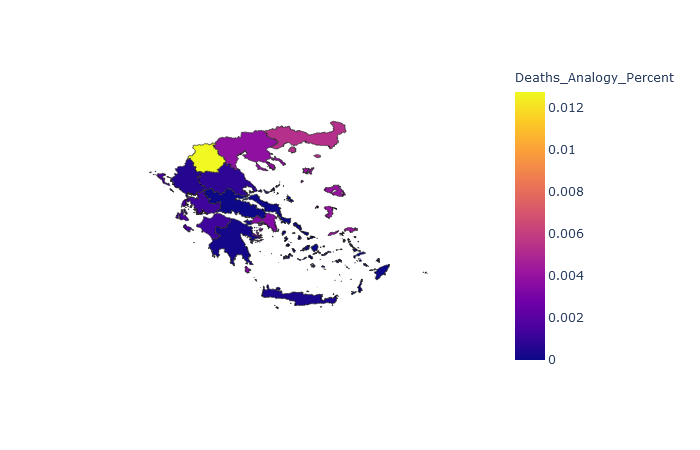

In [25]:
url = 'https://github.com/AngelosTheodorakis/Data_Analysis_Projects/blob/master/Covid-19_Greece/images/Greece_covid_deaths_prop.png?raw=true'
Disp.Image(requests.get(url).content)

The picture we now get is different. Northern Greece and especially Western Macedonia, seem to have a bigger problem with cases and deaths, in proportion with their population. We weren't able to see that before, just by observing the absolute numbers.<br>
However the numbers we gathered from Wikipedia for each region do not capture the entire Covid cases and deaths. There are lots of cases we cannot tell in which region they appeared, so the picture may be misleading. We will continue anyway and present some statistics from the data we have. However we will not sum the overall cases for each region, but use the total cases and deaths from the Wikipedia Dataframe.

In [26]:
Total_Cases = Covid_Greece_Wiki[4]['Cases'].iloc[16]

In [27]:
Total_Deaths = Covid_Greece_Wiki[4]['Deaths'].iloc[16]

In [28]:
Overall_death_per_given_case = Total_Deaths/Total_Cases*100
Overall_cases_percentage = Total_Cases/sum(combined['PopulationEstimate2019-01-01'].astype(int))*100
Overall_death_percentage = Total_Deaths/sum(combined['PopulationEstimate2019-01-01'].astype(int))*100

In [29]:
print('''In Greece, 1 in {} dies from Covid, given they have Covid. This is a {:.2f}% percentage.
Also, from the overall population, 1 in {} has diagnosed with Covid. \nFinally 1 in {:,} has died from Covid in Greece.'''.format(round(100/Overall_death_per_given_case),Overall_death_per_given_case,round(100/Overall_cases_percentage),round(100/Overall_death_percentage)))


In Greece, 1 in 49.0 dies from Covid, given they have Covid. This is a 2.03% percentage.
Also, from the overall population, 1 in 513.0 has diagnosed with Covid. 
Finally 1 in 25,294.0 has died from Covid in Greece.


\*Last update on 8 October 2020 